In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import io
%cd "C:\Users\DELL\OneDrive\Desktop\train"

C:\Users\DELL\OneDrive\Desktop\train


In [3]:
hrtrain=pd.read_csv("train_LZdllcl.csv")

In [4]:
hrtest=pd.read_csv("test_2umaH9m.csv")

In [5]:
hrtrain.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54808 entries, 0 to 54807
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   employee_id           54808 non-null  int64  
 1   department            54808 non-null  object 
 2   region                54808 non-null  object 
 3   education             52399 non-null  object 
 4   gender                54808 non-null  object 
 5   recruitment_channel   54808 non-null  object 
 6   no_of_trainings       54808 non-null  int64  
 7   age                   54808 non-null  int64  
 8   previous_year_rating  50684 non-null  float64
 9   length_of_service     54808 non-null  int64  
 10  KPIs_met >80%         54808 non-null  int64  
 11  awards_won?           54808 non-null  int64  
 12  avg_training_score    54808 non-null  int64  
 13  is_promoted           54808 non-null  int64  
dtypes: float64(1), int64(8), object(5)
memory usage: 5.9+ MB


In [6]:
hrtest.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23490 entries, 0 to 23489
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   employee_id           23490 non-null  int64  
 1   department            23490 non-null  object 
 2   region                23490 non-null  object 
 3   education             22456 non-null  object 
 4   gender                23490 non-null  object 
 5   recruitment_channel   23490 non-null  object 
 6   no_of_trainings       23490 non-null  int64  
 7   age                   23490 non-null  int64  
 8   previous_year_rating  21678 non-null  float64
 9   length_of_service     23490 non-null  int64  
 10  KPIs_met >80%         23490 non-null  int64  
 11  awards_won?           23490 non-null  int64  
 12  avg_training_score    23490 non-null  int64  
dtypes: float64(1), int64(7), object(5)
memory usage: 2.3+ MB


In [7]:
hrtrain.education.value_counts(dropna=False) # Impute NA's with "Bachelor's"

education
Bachelor's          36669
Master's & above    14925
NaN                  2409
Below Secondary       805
Name: count, dtype: int64

In [8]:
hrtrain.education=hrtrain.education.fillna(hrtrain.education.value_counts().idxmax())
# idxmax() will index of maximum frequency in value_counts() table

In [9]:
hrtest.education=hrtest.education.fillna(hrtest.education.value_counts().idxmax())

In [10]:
hrtrain.previous_year_rating.value_counts(dropna=False)

previous_year_rating
3.0    18618
5.0    11741
4.0     9877
1.0     6223
2.0     4225
NaN     4124
Name: count, dtype: int64

In [11]:
hrtrain.previous_year_rating=hrtrain.previous_year_rating.fillna(3.0)

In [12]:
hrtest.previous_year_rating=hrtest.previous_year_rating.fillna(3.0)

In [13]:
# Split Data into numcols & objectcols
numcols=hrtrain[['no_of_trainings', 'age','length_of_service','avg_training_score']]

objectcols=hrtrain[['department', 'region', 'education', 'gender','recruitment_channel',
                    'KPIs_met >80%', 'awards_won?','is_promoted']]

In [14]:
# EDA on Numeric Data  - describe() , skew() & kurt() - Univariate Statistics
# Histogram, Boxplot and Density Curve - avg_training_score - Univariate Plots
# Correlation and Heatmap - numcols - Bivariate Statistics & Plots

In [15]:
# EDA on Numeric Data  - describe() , skew() & kurt() - Univariate Statistics
print(numcols.describe())
print("Skewness:",numcols.skew())
print("Kurtosis:",numcols.kurt())

       no_of_trainings           age  length_of_service  avg_training_score
count     54808.000000  54808.000000       54808.000000        54808.000000
mean          1.253011     34.803915           5.865512           63.386750
std           0.609264      7.660169           4.265094           13.371559
min           1.000000     20.000000           1.000000           39.000000
25%           1.000000     29.000000           3.000000           51.000000
50%           1.000000     33.000000           5.000000           60.000000
75%           1.000000     39.000000           7.000000           76.000000
max          10.000000     60.000000          37.000000           99.000000
Skewness: no_of_trainings       3.445434
age                   1.007432
length_of_service     1.738061
avg_training_score    0.451908
dtype: float64
Kurtosis: no_of_trainings       18.740082
age                    0.792353
length_of_service      4.414031
avg_training_score    -1.049649
dtype: float64


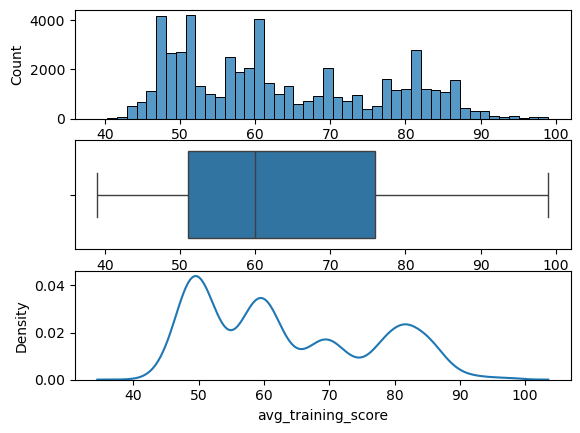

In [16]:
import seaborn as sns
fig,ax=plt.subplots(3,1) 
sns.histplot(hrtrain.avg_training_score,ax=ax[0])
sns.boxplot(hrtrain.avg_training_score,ax=ax[1],orient="h")
sns.kdeplot(hrtrain.avg_training_score,ax=ax[2]) 
plt.show() 

<Axes: >

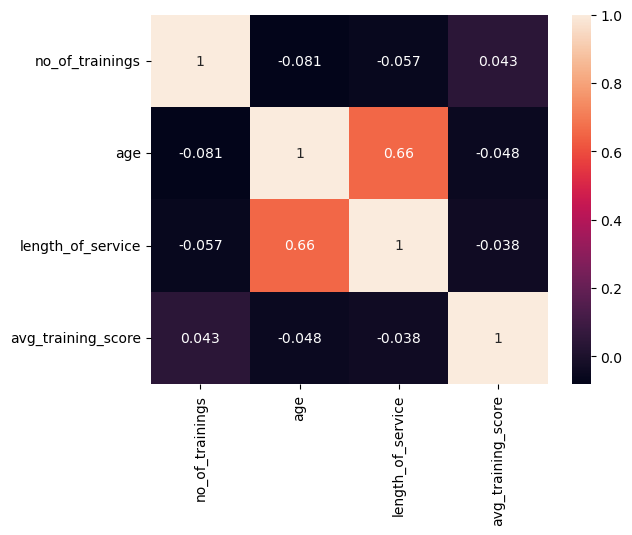

In [17]:
sns.heatmap(numcols.corr(),annot=True)

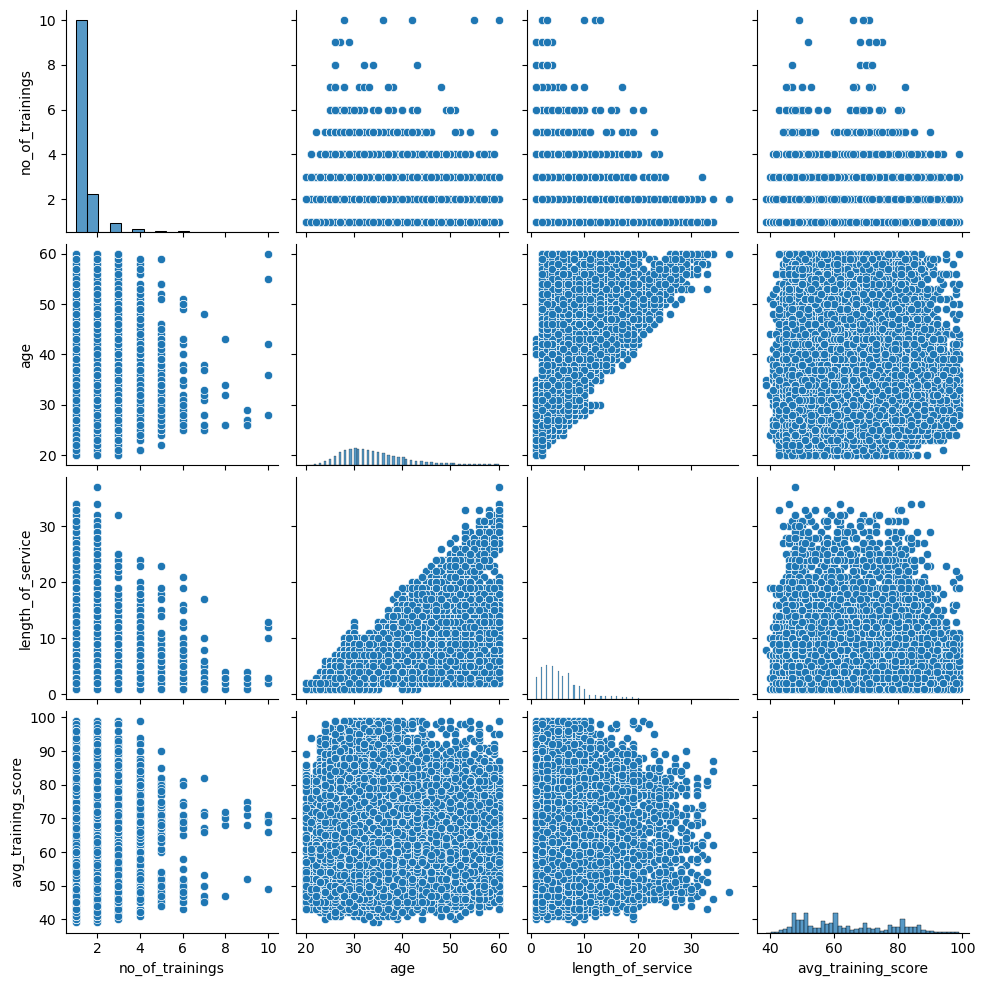

In [18]:
sns.pairplot(numcols) # Bivariate Plot - Scatter Plot

In [19]:
# Frequency Counts of all object cols
for col in objectcols.columns:
    freq=objectcols[col].value_counts()
    print(freq)

department
Sales & Marketing    16840
Operations           11348
Technology            7138
Procurement           7138
Analytics             5352
Finance               2536
HR                    2418
Legal                 1039
R&D                    999
Name: count, dtype: int64
region
region_2     12343
region_22     6428
region_7      4843
region_15     2808
region_13     2648
region_26     2260
region_31     1935
region_4      1703
region_27     1659
region_16     1465
region_28     1318
region_11     1315
region_23     1175
region_29      994
region_32      945
region_19      874
region_20      850
region_14      827
region_25      819
region_17      796
region_5       766
region_6       690
region_30      657
region_8       655
region_10      648
region_1       610
region_24      508
region_12      500
region_9       420
region_21      411
region_3       346
region_34      292
region_33      269
region_18       31
Name: count, dtype: int64
education
Bachelor's          39078
Maste

In [20]:
# What is Average avg_training_score for different gender?
hrtrain.avg_training_score.groupby(hrtrain.gender).mean()

gender
f    63.889897
m    63.173550
Name: avg_training_score, dtype: float64

In [21]:
# What is Average avg_training_score for different kpismet?
hrtrain.avg_training_score.groupby(hrtrain['KPIs_met >80%']).mean()

KPIs_met >80%
0    62.614241
1    64.809030
Name: avg_training_score, dtype: float64

In [22]:
# What is Average avg_training_score for different recruitment channel?
hrtrain.avg_training_score.groupby(hrtrain.recruitment_channel).mean()

recruitment_channel
other       63.362839
referred    66.182137
sourcing    63.280620
Name: avg_training_score, dtype: float64

In [23]:
# What is Average length_of_service for different education?
hrtrain.length_of_service.groupby(hrtrain.education).mean()

education
Bachelor's          5.286760
Below Secondary     1.704348
Master's & above    7.605293
Name: length_of_service, dtype: float64

In [24]:
# What is Average lenght_of_service for different department?
hrtrain.length_of_service.groupby(hrtrain.department).mean()

department
Analytics            4.932735
Finance              4.819401
HR                   5.683623
Legal                4.599615
Operations           6.416020
Procurement          6.331045
R&D                  4.554555
Sales & Marketing    5.912292
Technology           5.914822
Name: length_of_service, dtype: float64

In [25]:
# What is Average avg_trainig_score for different department?
hrtrain.avg_training_score.groupby(hrtrain.department).mean()

department
Analytics            84.602952
Finance              60.222003
HR                   50.018197
Legal                59.868142
Operations           60.226648
Procurement          70.122443
R&D                  84.596597
Sales & Marketing    50.261698
Technology           79.928692
Name: avg_training_score, dtype: float64

In [26]:
# Test Null Average avg_training_score for different gender equal.
# split data, Frame Null & Alt, Conduct test & Interpret 
# Exactly 2 levels/classes - 2 Sample Independent T test

male=hrtrain[hrtrain.gender=="m"]
female=hrtrain[hrtrain.gender=="f"]

# Null - There is no significant difference in Average avg_training_score of male&female
# Alt - There is significant difference in Average avg_training_score of male&female

In [27]:
from scipy.stats import ttest_ind

In [28]:
ttest_ind(male.avg_training_score,female.avg_training_score,equal_var=False)
# Since pvalue=9.321257169457854e-10 is less than 0.05, Reject Null

TtestResult(statistic=-6.122262326710494, pvalue=9.321257169457854e-10, df=35820.249659813104)

In [29]:
# Test Null Average avg_training_score for different recruitment_channel equal.
# split data, Frame Null & Alt, Conduct test & Interpret 
# more than 2 levels/classes -Anova Single Factor

referal=hrtrain[hrtrain.recruitment_channel=="referred"]
source=hrtrain[hrtrain.recruitment_channel=="sourcing"]
other=hrtrain[hrtrain.recruitment_channel=="other"]

# Null - There is no significant difference in Average avg_training_score of different
# recruitment channl
# Alt - There is significant difference in Average avg_training_score of different
# recruitment channel

In [30]:
from scipy.stats import f_oneway

In [31]:
f_oneway(referal.avg_training_score,source.avg_training_score,other.avg_training_score)
# Since pvalue=6.585805990029605e-12 is less than 0.05, Reject Null

F_onewayResult(statistic=25.758203095600138, pvalue=6.585805990029605e-12)

In [32]:
# Test Null No Association between gender and is_promoted
# Both variables non numeric categorical - Chi Square test of independence

# Null - There is no association between both variables
# Alt - There is association between both variables

from scipy.stats import chi2_contingency
chi2_contingency(pd.crosstab(hrtrain.is_promoted,hrtrain.gender))
# Since pvalue=0.009765091521176657 is less thn 0.05, Reject null

Chi2ContingencyResult(statistic=6.677254566546107, pvalue=0.009765091521176657, dof=1, expected_freq=array([[14922.70617428, 35217.29382572],
       [ 1389.29382572,  3278.70617428]]))

In [33]:
# Dummy Variable encoding
objectcols_dummy=pd.get_dummies(objectcols,columns=['department', 'region', 'education', 
                                                    'gender', 'recruitment_channel',
                                                    'KPIs_met >80%', 'awards_won?'])

In [34]:
# Concatenate numcols & objectcols_dummy - Column Concatenation
hrtrain_df=pd.concat([numcols,objectcols_dummy],axis=1)

In [35]:
# Split data into dependent variable(y) & Independent Variables(X)
y=hrtrain_df.is_promoted
X=hrtrain_df.drop('is_promoted',axis=1)

In [36]:
# LabelEncode dependent variable (y)
from sklearn.preprocessing import LabelEncoder

In [37]:
y=LabelEncoder().fit_transform(y)

In [38]:
from sklearn.linear_model import LogisticRegression

In [39]:
logit=LogisticRegression(max_iter=2000)

In [40]:
logitmodel=logit.fit(X,y)

In [41]:
logitmodel.score(X,y) # Accuracy from Confusion matrix

0.9316340680192673

In [42]:
logitpredict=logitmodel.predict(X) # Predicted Class

In [43]:
pd.crosstab(y,logitpredict) # Confusion Matrix

col_0,0,1
row_0,,
0,49882,258
1,3489,1179


In [44]:
(49871+1201)/(49871+269+3467+1201)

# is_promoted - Negative - 0 & Positive - 1
# 49871 - True Negative
# 269 - False Positive
# 3467 - False Negative
# 1201 - True Positive

# Accuracy - 0.9318347686469128 - (TN+TP)/(TN+FP+FN+TP)

0.9318347686469128

In [45]:
from sklearn.metrics import classification_report

In [46]:
print(classification_report(y,logitpredict))

              precision    recall  f1-score   support

           0       0.93      0.99      0.96     50140
           1       0.82      0.25      0.39      4668

    accuracy                           0.93     54808
   macro avg       0.88      0.62      0.68     54808
weighted avg       0.92      0.93      0.91     54808



In [47]:
# Supervised Learning - Classification Algorithms used when dependent variable(y) is
# non numerical and binary or multinomial(more than 2 levels/classes)

# Binary Logistic Regression explains relationship between a binary dependent variable(y)
# and multiple independent variables(X's). Non Linear relationship as distribution
# is S shaped curve. Binary Logistic Regression is an equation.
#       exp^B0+B1X1+B2X2+B3X3+............+BnXn
# p= ----------------------------------------------
#      1+ exp^B0+B1X1+B2X2+B3X3+............+BnXn
# p - probability that lies between 0 and 1. Predicted Probability is outcome of equation
# exp - exponential or 2.718
# Bo - intercept or constant
# B1 B2 B3 .... Bn - Coefficients
# X1 X2 X3 .....Xn - Independent Variables

# Classification Rule 
# Predicted Probability greater than equal to >= 0.50 ----- 1 or Yes
# Predicted Probability less than < 0.50 ------ 0 or No

# Binary Logistic regression is a parametric algorithm. Parametric Algorithms have 
# assumptions that need to be met.
# Assumptions
# 1) Dependent Variable (y) must be binary or 0/1 or Yes/No or True/False
# 2) Independent Variables (X's) can be both numeric and non numeric categorical
# 3) There must be a logical relationship between dependent variable and independent
# variables.
# 4) No Multicollinearity
# 5) Sample Size must be minimum 50 observations per variable

# Interpretation of Output based on Confusion Matrix 
# Confusion Matrix is a 2 X 2 Matrix or cross tabulation of predicted class and actual
# class.
# Primary metric is Accuracy
#                        True Positive(TP) + True Negative(TN)
# Accuracy = ----------------------------------------------------------------------------
#              True Positive(TP)+False Negative(FN)+False Positive(FP)+True Negative(TN)  

# Sensitivity or Recall = TP/(TP+FN)
# Specificty = TN/(TN+FP)
# Precision = TP/(TP+FP)
#                    Precision * Recall
# F1 Score - = 2 X -----------------------
#                    Precision + Recall
# All metrics must be between 0.70 till 0.95
# less than 0.70 - Underfitting
# greater than 0.95 - Overfitting

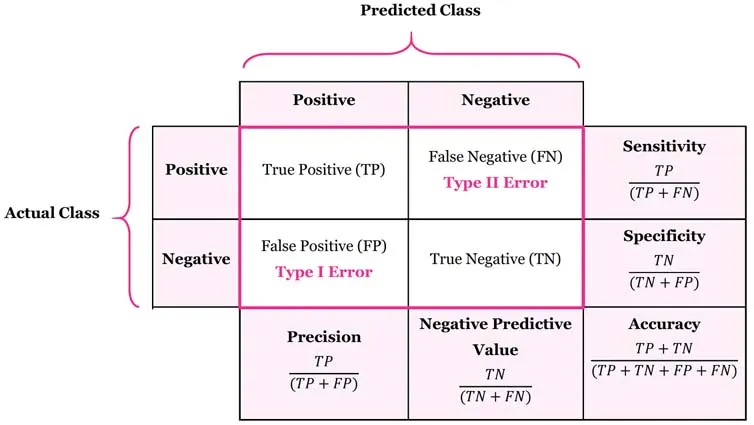

In [49]:
# AUC Curve - A receiver operating characteristic curve, or ROC curve, is a graphical 
# plot that shows the performance of a binary classifier model at different threshold.
# The ROC curve is the plot of the true positive rate (TPR) against the false positive 
# rate (FPR) at each threshold setting.
# AUC above 0.70 is a good fit model

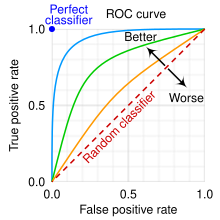

In [51]:
from sklearn.metrics import RocCurveDisplay

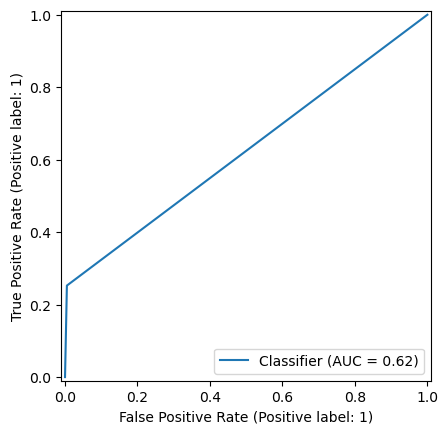

In [52]:
RocCurveDisplay.from_predictions(y,logitpredict) # AUC 0.63 - Not a good fit Model

In [53]:
# Regression Models fail due to skewness,kurtosis and outliers in dependent variable(y)

# Classification models fail due to imbalance data or class/level imbalance in dependent
# variable (y)
# Imbalance data is where one class/level is far higher than other class/level
# In HR Analytics data dependent variable(y) is is_promoted. 0 (50140) & 1 (4668)
# 0 is Majority Class (50140) and 1 is Minorty Class (4668)

<Axes: xlabel='is_promoted'>

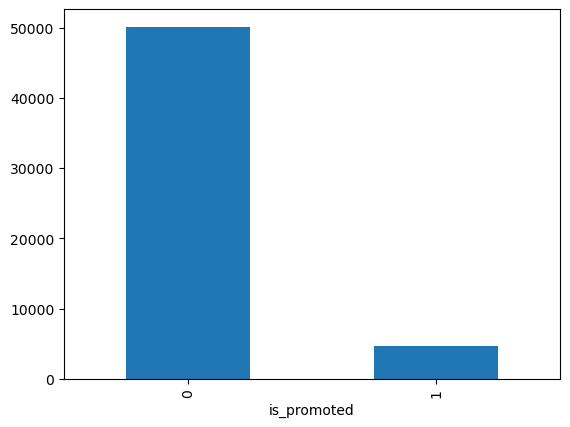

In [54]:
hrtrain.is_promoted.value_counts().plot(kind="bar")

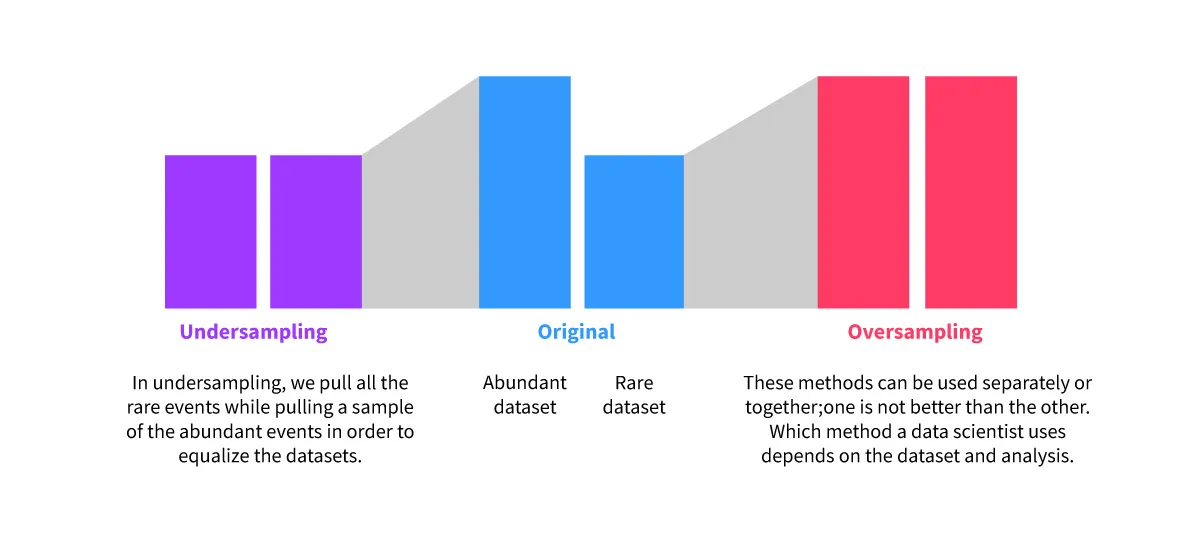


In [56]:
from sklearn.tree import DecisionTreeClassifier

In [57]:
tree=DecisionTreeClassifier()

In [58]:
treemodel=tree.fit(X,y)

In [59]:
treemodel.score(X,y) # Accuracy greater than 0.95 - Overfitting

0.9989235148153555

In [60]:
# Overfitting is Accuracy or R SQuare on Train Model will be closer to 1.

# But upon Cross Validation or Repeated testing with randomly selected samples of 
# same data, Accuracy or R Square will drasticall fall or less than or close to 
# 0.60.

# Whenever Decision Tree Models are run Cross Validation must be done to check for
# Overfitting.
# If Overfitting is found reduce max_depth= .

# Train Model Metrics and Cross Validated metrics must be closer typically +- 10% range

In [61]:
from sklearn.model_selection import cross_val_score

In [62]:
cross_val_score(tree,X,y,cv=5)

array([0.89782886, 0.90029192, 0.89326765, 0.89818447, 0.89535626])

In [63]:
np.mean([0.89673417, 0.89883233, 0.89545703, 0.89736338, 0.89553873])

0.896785128

In [64]:
treemodel2=DecisionTreeClassifier(max_depth=8).fit(X,y)

In [65]:
treemodel2.score(X,y)

0.9388410451029047

In [66]:
cross_val_score(treemodel2,X,y,cv=5) # Train Accuracy & Cross Validation Average 
# Accuracy are close, hence stable model

array([0.93814997, 0.93532202, 0.93705528, 0.93312654, 0.93695831])

In [67]:
treepredict=treemodel2.predict(X)

In [68]:
pd.crosstab(y,treepredict) # Confusion Matrix

col_0,0,1
row_0,,
0,50076,64
1,3288,1380


In [69]:
print(classification_report(y,treepredict))

              precision    recall  f1-score   support

           0       0.94      1.00      0.97     50140
           1       0.96      0.30      0.45      4668

    accuracy                           0.94     54808
   macro avg       0.95      0.65      0.71     54808
weighted avg       0.94      0.94      0.92     54808



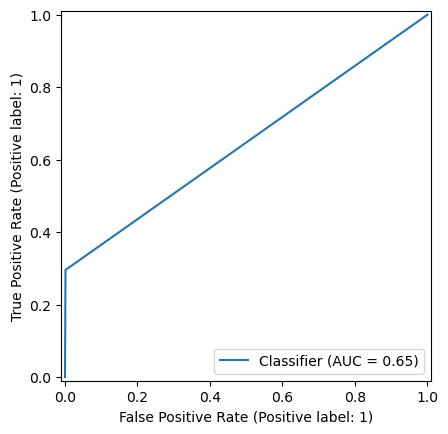

In [70]:
RocCurveDisplay.from_predictions(y,treepredict)

In [71]:
from sklearn.tree import plot_tree

[Text(0.5089285714285714, 0.9, 'avg_training_score <= 90.5\ngini = 0.156\nsamples = 54808\nvalue = [50140, 4668]'),
 Text(0.2857142857142857, 0.7, 'KPIs_met >80%_1 <= 0.5\ngini = 0.142\nsamples = 54229\nvalue = [50069, 4160]'),
 Text(0.14285714285714285, 0.5, 'awards_won?_0 <= 0.5\ngini = 0.067\nsamples = 35295\nvalue = [34064, 1231]'),
 Text(0.07142857142857142, 0.3, 'avg_training_score <= 58.5\ngini = 0.499\nsamples = 388\nvalue = [202.0, 186.0]'),
 Text(0.03571428571428571, 0.1, '\n  (...)  \n'),
 Text(0.10714285714285714, 0.1, '\n  (...)  \n'),
 Text(0.21428571428571427, 0.3, 'avg_training_score <= 60.5\ngini = 0.058\nsamples = 34907\nvalue = [33862, 1045]'),
 Text(0.17857142857142858, 0.1, '\n  (...)  \n'),
 Text(0.25, 0.1, '\n  (...)  \n'),
 Text(0.42857142857142855, 0.5, 'avg_training_score <= 88.5\ngini = 0.262\nsamples = 18934\nvalue = [16005.0, 2929.0]'),
 Text(0.35714285714285715, 0.3, 'awards_won?_0 <= 0.5\ngini = 0.257\nsamples = 18717\nvalue = [15883, 2834]'),
 Text(0.321

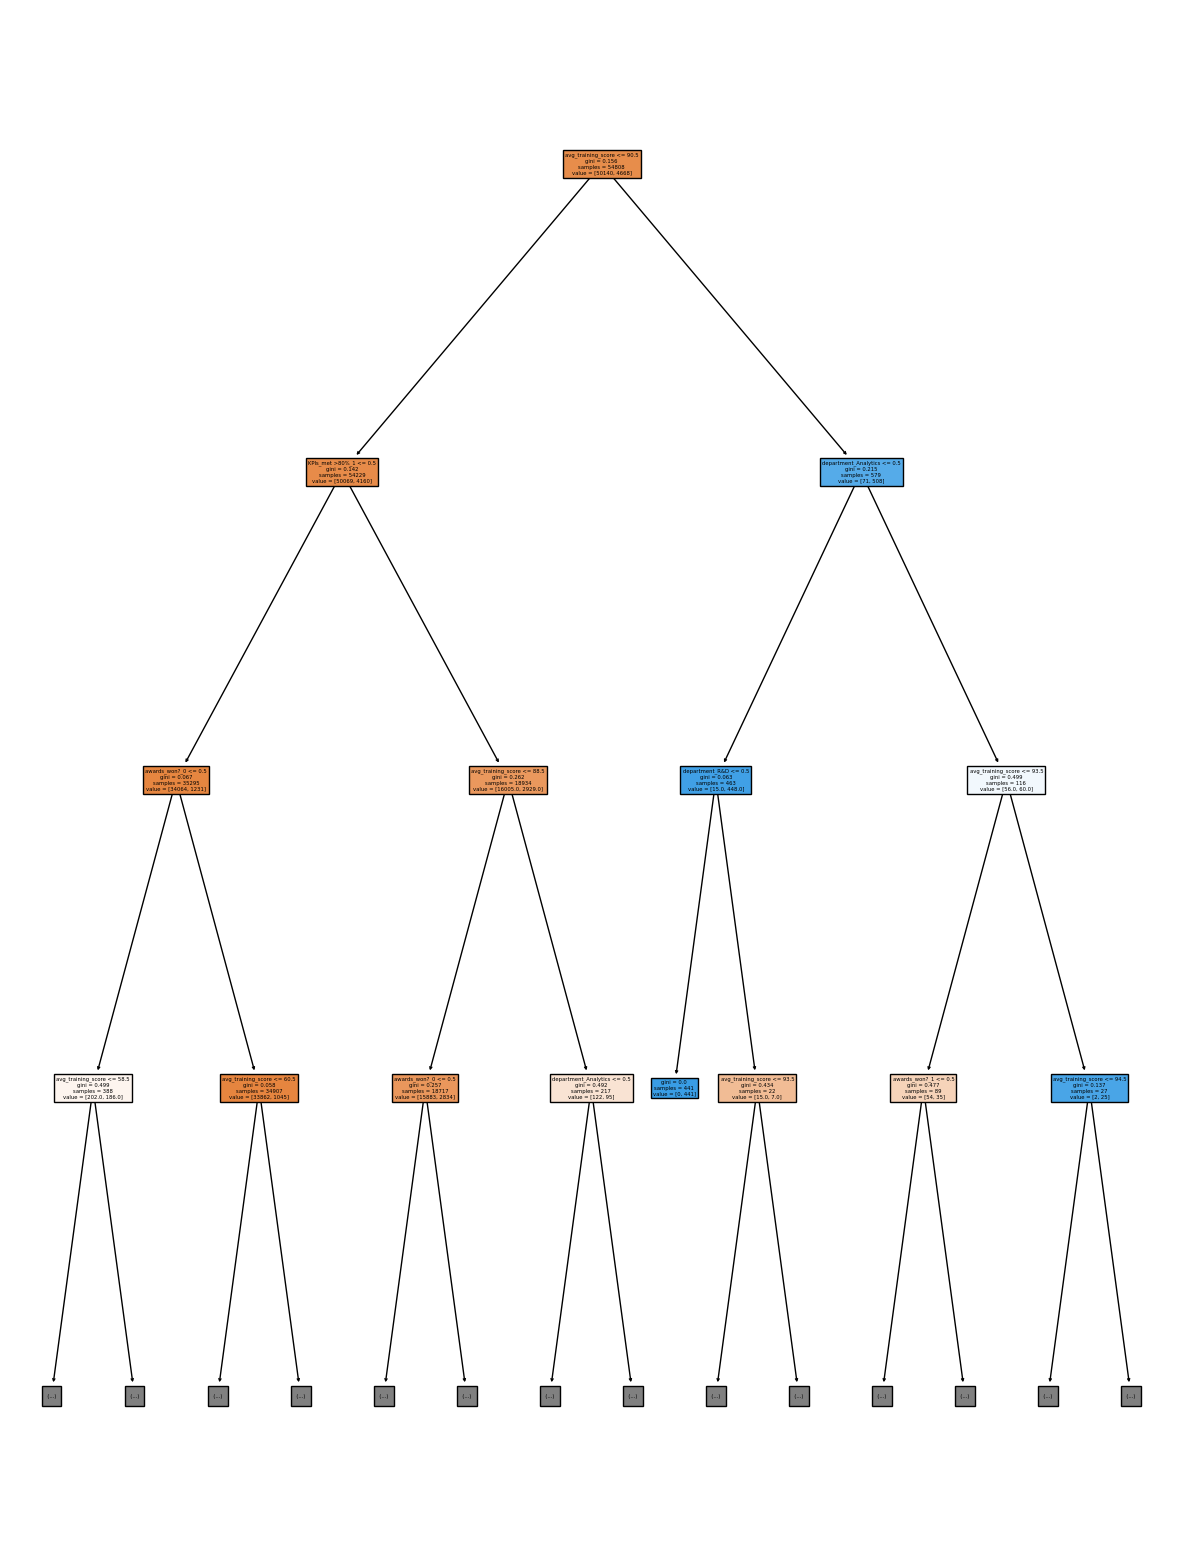

In [72]:
plt.figure(figsize=(15,20))
plot_tree(treemodel2,feature_names=X.columns,max_depth=3,filled=True)

In [73]:
from sklearn.tree import _tree
def get_rules(tree, feature_names, class_names):
    tree_ = tree.tree_
    feature_name = [
        feature_names[i] if i != _tree.TREE_UNDEFINED else "undefined!"
        for i in tree_.feature
    ]

    paths = []
    path = []
   
    def recurse(node, path, paths):
       
        if tree_.feature[node] != _tree.TREE_UNDEFINED:
            name = feature_name[node]
            threshold = tree_.threshold[node]
            p1, p2 = list(path), list(path)
            p1 += [f"({name} <= {np.round(threshold, 3)})"]
            recurse(tree_.children_left[node], p1, paths)
            p2 += [f"({name} > {np.round(threshold, 3)})"]
            recurse(tree_.children_right[node], p2, paths)
        else:
            path += [(tree_.value[node], tree_.n_node_samples[node])]
            paths += [path]
           
    recurse(0, path, paths)

    # sort by samples count
    samples_count = [p[-1][1] for p in paths]
    ii = list(np.argsort(samples_count))
    paths = [paths[i] for i in reversed(ii)]
   
    rules = []
    for path in paths:
        rule = "if "
       
        for p in path[:-1]:
            if rule != "if ":
                rule += " and "
            rule += str(p)
        rule += " then "
        if class_names is None:
            rule += "response: "+str(np.round(path[-1][0][0][0],3))
        else:
            classes = path[-1][0][0]
            l = np.argmax(classes)
            rule += f"class: {class_names[l]} (proba: {np.round(100.0*classes[l]/np.sum(classes),2)}%)"
        rule += f" | based on {path[-1][1]:,} samples"
        rules += [rule]
       
    return rules

In [74]:
rules = get_rules(treemodel2,X.columns,y)
for r in rules:
    print(r)

if (avg_training_score <= 90.5) and (KPIs_met >80%_1 <= 0.5) and (awards_won?_0 > 0.5) and (avg_training_score <= 60.5) and (avg_training_score <= 57.5) and (avg_training_score <= 54.5) and (avg_training_score <= 53.5) then class: 0 (proba: 100.0%) | based on 12,649 samples
if (avg_training_score <= 90.5) and (KPIs_met >80%_1 <= 0.5) and (awards_won?_0 > 0.5) and (avg_training_score > 60.5) and (department_Sales & Marketing <= 0.5) and (department_HR <= 0.5) and (department_Operations <= 0.5) and (avg_training_score <= 79.5) then class: 0 (proba: 98.82%) | based on 7,384 samples
if (avg_training_score <= 90.5) and (KPIs_met >80%_1 <= 0.5) and (awards_won?_0 > 0.5) and (avg_training_score > 60.5) and (department_Sales & Marketing <= 0.5) and (department_HR <= 0.5) and (department_Operations <= 0.5) and (avg_training_score > 79.5) then class: 0 (proba: 93.57%) | based on 6,037 samples
if (avg_training_score <= 90.5) and (KPIs_met >80%_1 > 0.5) and (avg_training_score <= 88.5) and (awards

In [75]:
test_num=hrtest[['no_of_trainings', 'age','length_of_service',
                 'avg_training_score']]

In [76]:
test_object=hrtest[['department', 'region', 'education', 'gender',
                    'recruitment_channel','KPIs_met >80%', 'awards_won?']]

In [77]:
test_object_dummy=pd.get_dummies(test_object,columns=['department', 'region', 
                                                      'education','gender',
                                                      'recruitment_channel',
                                                      'KPIs_met >80%', 
                                                      'awards_won?'])

In [78]:
hrtest_df=pd.concat([test_num,test_object_dummy],axis=1)

In [79]:
# Dependent Variable predictions on test data using Logistic Regression
test_logit_pred=logitmodel.predict(hrtest_df)

In [80]:
# Writing predictions to csv file
pd.DataFrame(test_logit_pred).to_csv("LogisticReg.csv")

In [81]:
# Dependent Variable Predictions on test data using Decision tree Classifier
test_tree_pred=treemodel2.predict(hrtest_df)

In [82]:
pd.DataFrame(test_tree_pred).to_csv("DecisionTree.csv")

In [83]:
from sklearn.ensemble import RandomForestClassifier

In [84]:
RFmodel=RandomForestClassifier(n_estimators=1000).fit(X,y)

In [85]:
RFmodel.score(X,y)

0.9989235148153555

In [86]:
RF_pred=RFmodel.predict(hrtest_df)

In [87]:
pd.DataFrame(RF_pred).to_csv("RF.csv")